In [1]:
from skimage.io import imread, imsave, imshow
import numpy as np
import glob
import matplotlib.pyplot as plt

In [2]:
import os
names = glob.glob('*png')
for name in names:
    iname = name.split('-')[0]
    itime = name.split(':')[-1].strip('.png')
    name_out = iname+'_'+itime+'.png'
    os.rename(name,name_out)

In [18]:
Colors = np.array([[  0,   0,   0,   0],
                   [ 31,  60,  36, 255],
                   [ 31, 119, 180, 255],
                   [ 44, 160,  44, 255],
                   [214,  39,  40, 255]], dtype='uint8')

In [20]:
mask_names = ['microvilli','nucleus','basement','goblet']

In [25]:
names = glob.glob('*png')


In [41]:
img1.shape
ColorChannels=np.unique(img1)

In [42]:
def binarize_img(image,mask_names,ColorChannels):
    img = imread(image)
    mask_dict={}
    for ch in range(3):
        for idx,mask in enumerate(mask_names):
            mask_data = img[:,:]==ColorChannels[idx+1]
            mask_dict[mask] = mask_data
    return mask_dict

In [54]:
def generate_mask_image(mask_dict,color_dict):
    num_masks = len(mask_dict.keys())
    img = np.zeros((1024,1024,4),dtype='uint8')
    for ch in range(4):
        for idx,mask in enumerate(mask_dict.keys()):
            img[:,:,ch]+=mask_dict[mask].astype(img.dtype)*Colors[idx+1,ch]
    return img

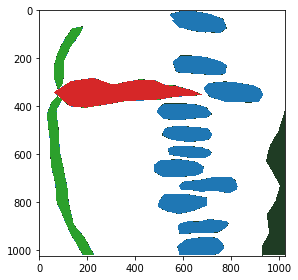

In [55]:
names = glob.glob('*png')
im_dic = binarize_img(names[0],mask_names,ColorChannels)
im_out = generate_mask_image(im_dic,Colors)

imshow(im_out)

In [57]:
np.unique(im_out.reshape(-1, im_out.shape[2]), axis=0)

array([[  0,   0,   0,   0],
       [ 31,  60,  36, 255],
       [ 31, 119, 180, 255],
       [ 44, 160,  44, 255],
       [214,  39,  40, 255]], dtype=uint8)

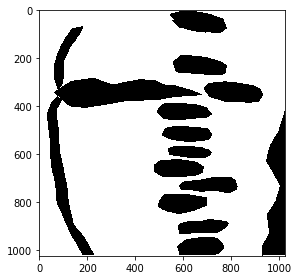

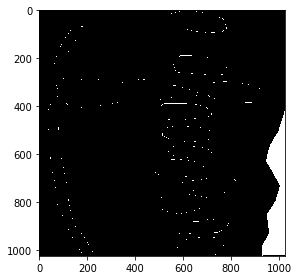

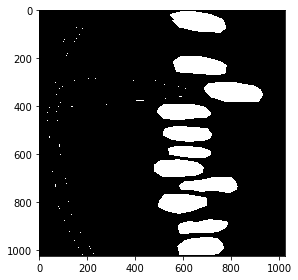

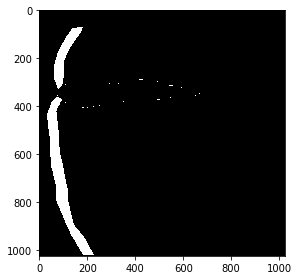

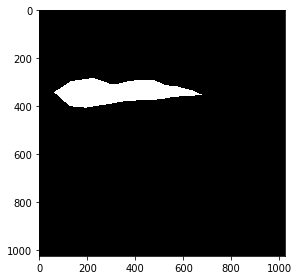

In [60]:
uniquevals = np.unique(img1)
for val in uniquevals:
    imshow(img1==val)
    plt.show()